In [6]:
import pandas as pd
import numpy as py
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',low_memory=False)

In [7]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### This dataset gets 37 attributes and originally 194673 rows.

In [8]:
df.shape

(194673, 38)

### First we check all the data type in this dataset.

In [9]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### The label we want to predict using this dataset is SEVERITYCODE. 1 means prop damage. 2 means injury.

In [5]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

#### We can use the WEATHER, ROADCOND, COLLISIONTYPE, LIGHTCOND and VEHCOUNT to predict the SEVERITYCODE.

In [17]:
df_new=df[['SEVERITYCODE','WEATHER','ROADCOND','COLLISIONTYPE','LIGHTCOND','VEHCOUNT']]
df_new.head()

,SEVERITYCODE,WEATHER,ROADCOND,COLLISIONTYPE,LIGHTCOND,VEHCOUNT
0,2,Overcast,Wet,Angles,Daylight,2
1,1,Raining,Wet,Sideswipe,Dark - Street Lights On,2
2,1,Overcast,Dry,Parked Car,Daylight,3
3,1,Clear,Dry,Other,Daylight,3
4,2,Raining,Wet,Angles,Daylight,2


In [18]:
import seaborn as sns
%matplotlib inline

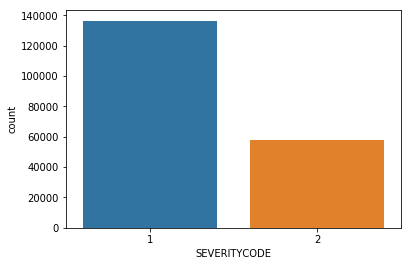

In [19]:
sns.countplot(x = 'SEVERITYCODE',data=df)

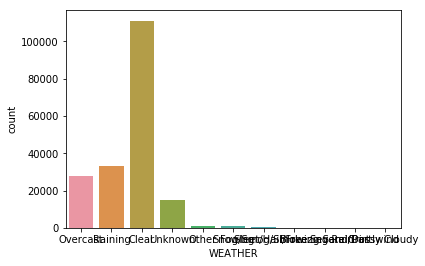

In [20]:
sns.countplot(x = 'WEATHER',data=df)

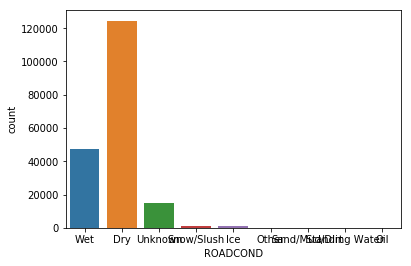

In [21]:
sns.countplot(x = 'ROADCOND',data=df)

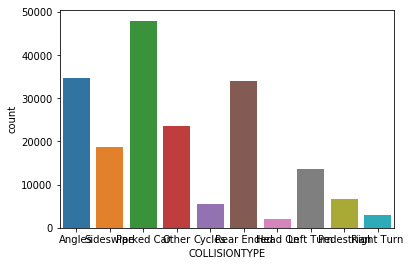

In [22]:
sns.countplot(x = 'COLLISIONTYPE',data=df)

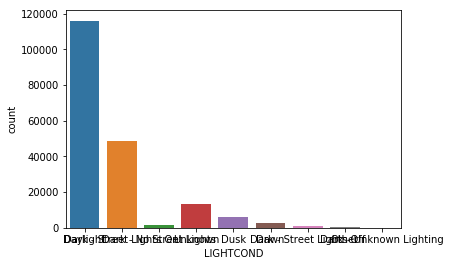

In [23]:
sns.countplot(x = 'LIGHTCOND',data=df)

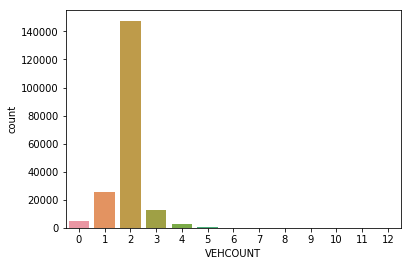

In [24]:
sns.countplot(x = 'VEHCOUNT',data=df)